In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import numpy as np
from matplotlib import pyplot as plt
from pylamp.neural.activations import Softmax
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps

In [44]:
def plot_loss(losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def print_accuracy(model,X_test,y_test):
    y_pred = np.argmax(model.forward(X_test),axis=1)

    accuracy = np.sum(y_test == y_pred)/len(y_test)

    print(f'Accuracy = {accuracy}')

## Loading Data

In [45]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

Label:  6
x size:  256


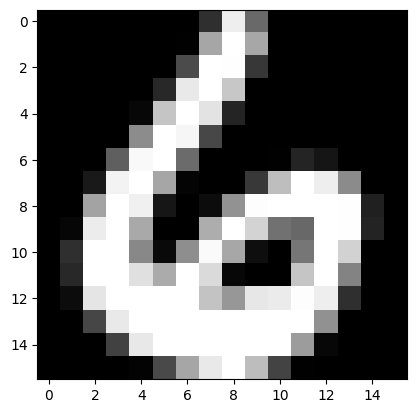

In [46]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Testing Multi Class Model

In [47]:
num_classes = 10

### One hot encode label

In [48]:
y_train_one_hot = np.eye(num_classes)[y_train]

In [49]:
y_train_one_hot[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

## Sequential with a single linear layer

In [50]:
sequential_model = Sequential()

# no need for softmax activation because it is included in the loss function
sequential_model.add_module(Linear(input_size=256, output_size=10))

loss_func = CrossEntropyLoss()
optimizer = Optim(sequential_model,loss_func,1e-5)
batch_size = 256
epochs = 500

sequential_model_losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)

Epoch 1/500, Average Loss: 12.44690382435617
Epoch 51/500, Average Loss: 3.768244693271304


KeyboardInterrupt: 

Accuracy = 0.38016940707523666


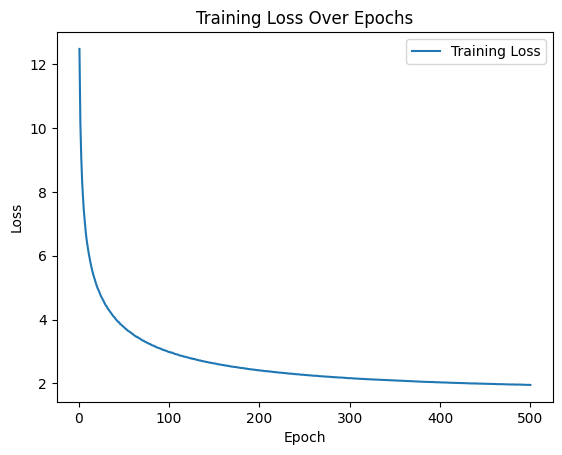

In [ ]:
print_accuracy(sequential_model,X_test,y_test)
plot_loss(sequential_model_losses)

## Linear Module

In [ ]:
model_linear = Linear(input_size=256, output_size=10)
loss_func = CrossEntropyLoss()

optimizer_linear = Optim(model_linear,loss_func,1e-5)

batch_size = 256
epochs = 500

model_linear_losses = SGD(optimizer_linear,X_train, y_train_one_hot, batch_size,epochs,verbose=True)


Epoch 1/500, Average Loss: 13.024887608717634
Epoch 51/500, Average Loss: 3.810974434889011
Epoch 101/500, Average Loss: 3.0544089394489737
Epoch 151/500, Average Loss: 2.6786316992111705
Epoch 201/500, Average Loss: 2.453377317693106
Epoch 251/500, Average Loss: 2.296554188645834
Epoch 301/500, Average Loss: 2.185932612560416
Epoch 351/500, Average Loss: 2.105858329801766
Epoch 401/500, Average Loss: 2.0427449809055593
Epoch 451/500, Average Loss: 1.9932763337394834
Training finished.


Accuracy = 0.38714499252615847


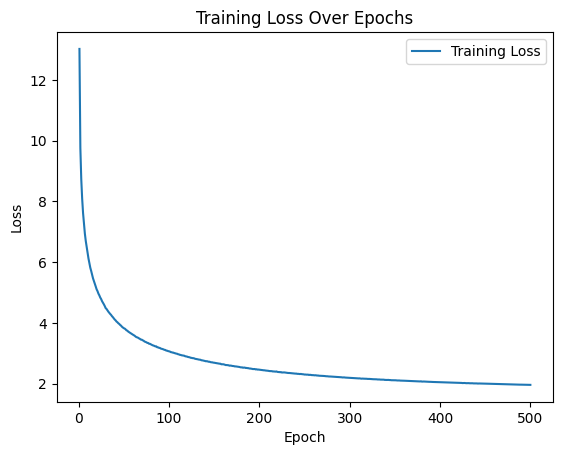

In [ ]:
print_accuracy(model_linear,X_test,y_test)
plot_loss(model_linear_losses)